# Logistic Regression Project 

In this project, we will be working with a synthetic advertising dataset that indicates whether a specific internet user clicked on an advertisement. Our goal is to develop a model that can predict whether a user will click on an ad based on their characteristics.

This dataset includes the following features:

    'Daily Time Spent on Site': The amount of time (in minutes) a user spends on the website per day.
    'Age': The user's age in years.
    'Area Income': The average income of the user's geographical area.
    'Daily Internet Usage': The average number of minutes per day the user spends online.
    'Ad Topic Line': The headline of the advertisement.
    'City': The user's city of residence.
    'Male': Indicates whether the user is male.
    'Country': The user's country of residence.
    'Timestamp': The exact time when the user clicked on the ad or closed the window.
    'Clicked on Ad': A binary variable (0 or 1) indicating whether the user clicked on the advertisement.

## Import Libraries


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [5]:
df=pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [9]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [13]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


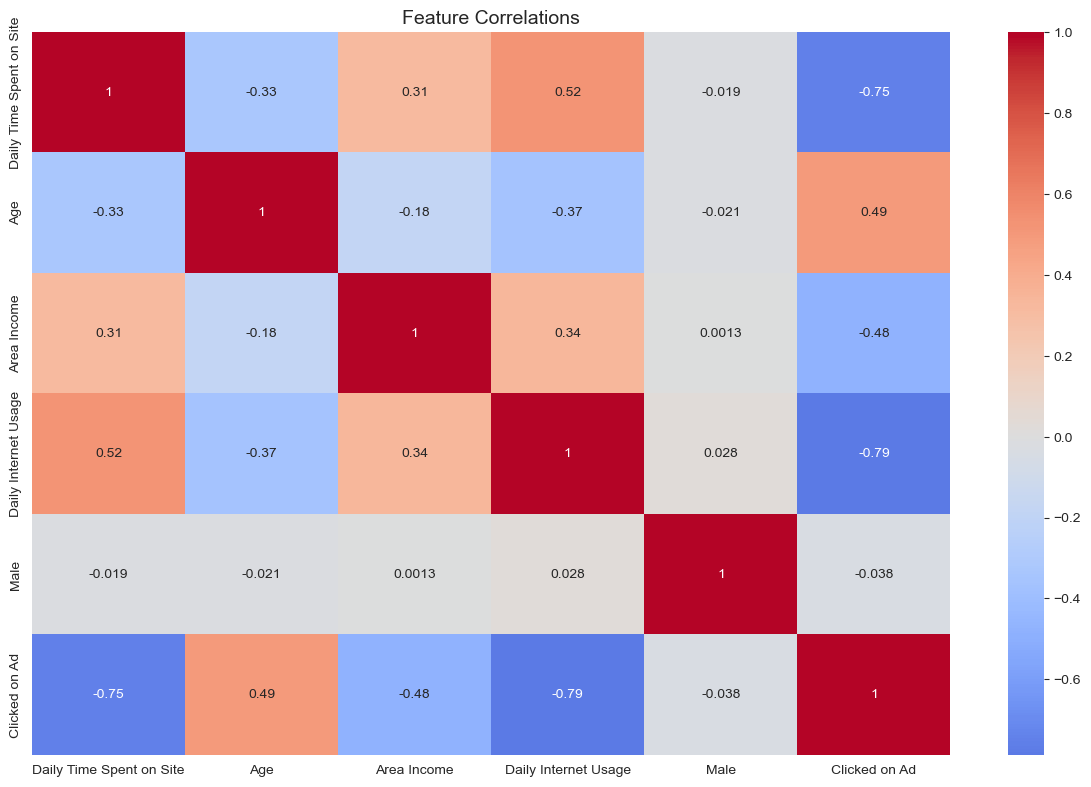

In [59]:
# Feature Correlations
plt.figure(figsize=(12, 8))
correlations = df.drop(['Ad Topic Line', 'City','Country','Timestamp'], axis=1).corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlations', fontsize=14)
plt.tight_layout()
plt.show()

## Exploratory Data Analysis

** Create a histogram of the Age**

Text(0.5, 0, 'Age')

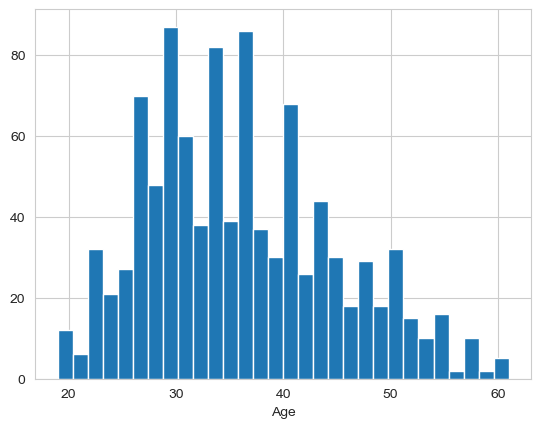

In [25]:
sns.set_style('whitegrid')
df['Age'].hist(bins=30)
plt.xlabel('Age')

**Create a jointplot showing Area Income versus Age.**

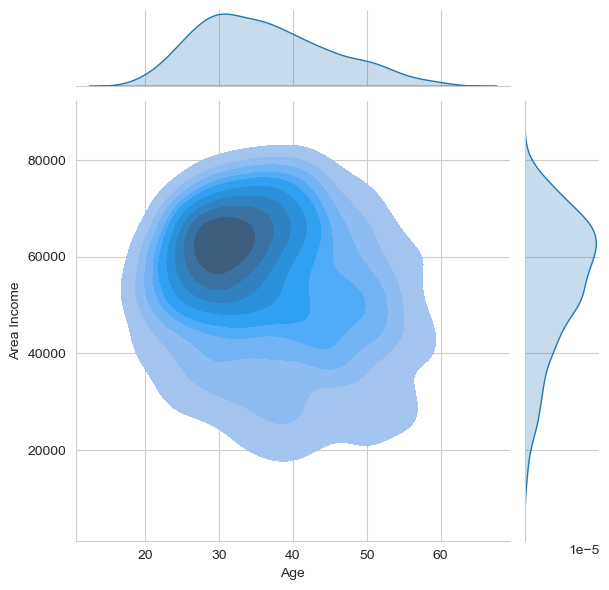

In [37]:
sns.jointplot(x='Age',y='Area Income', data=df,kind='kde',fill=True)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

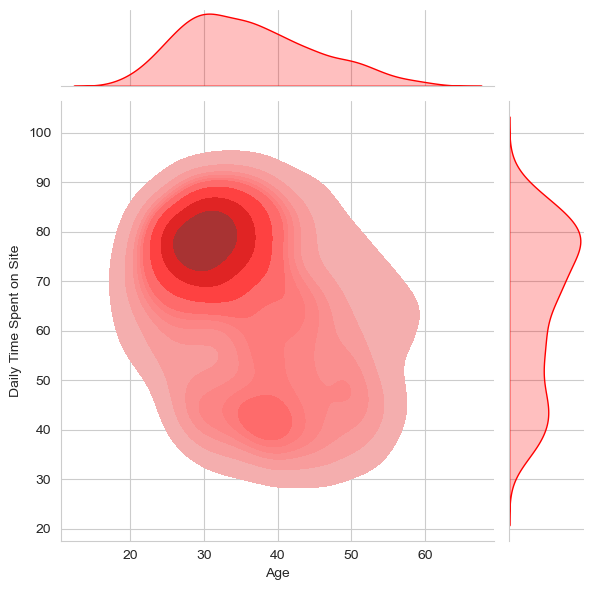

In [35]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=df,color='red',kind='kde',fill=True)

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

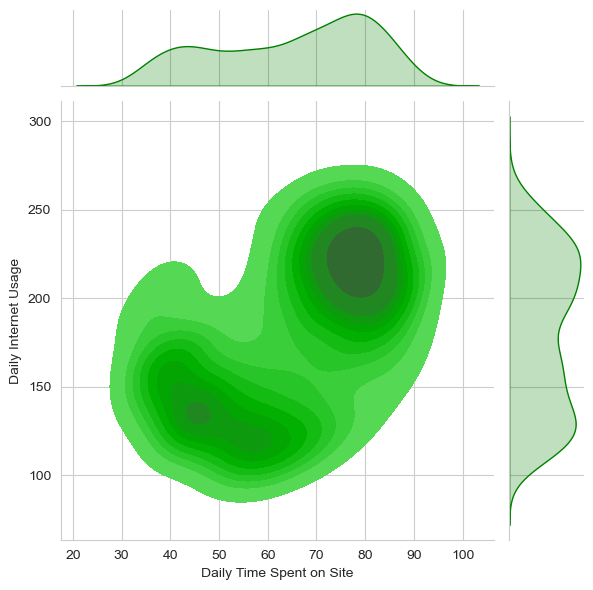

In [39]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=df,color='green',kind='kde',fill=True)

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

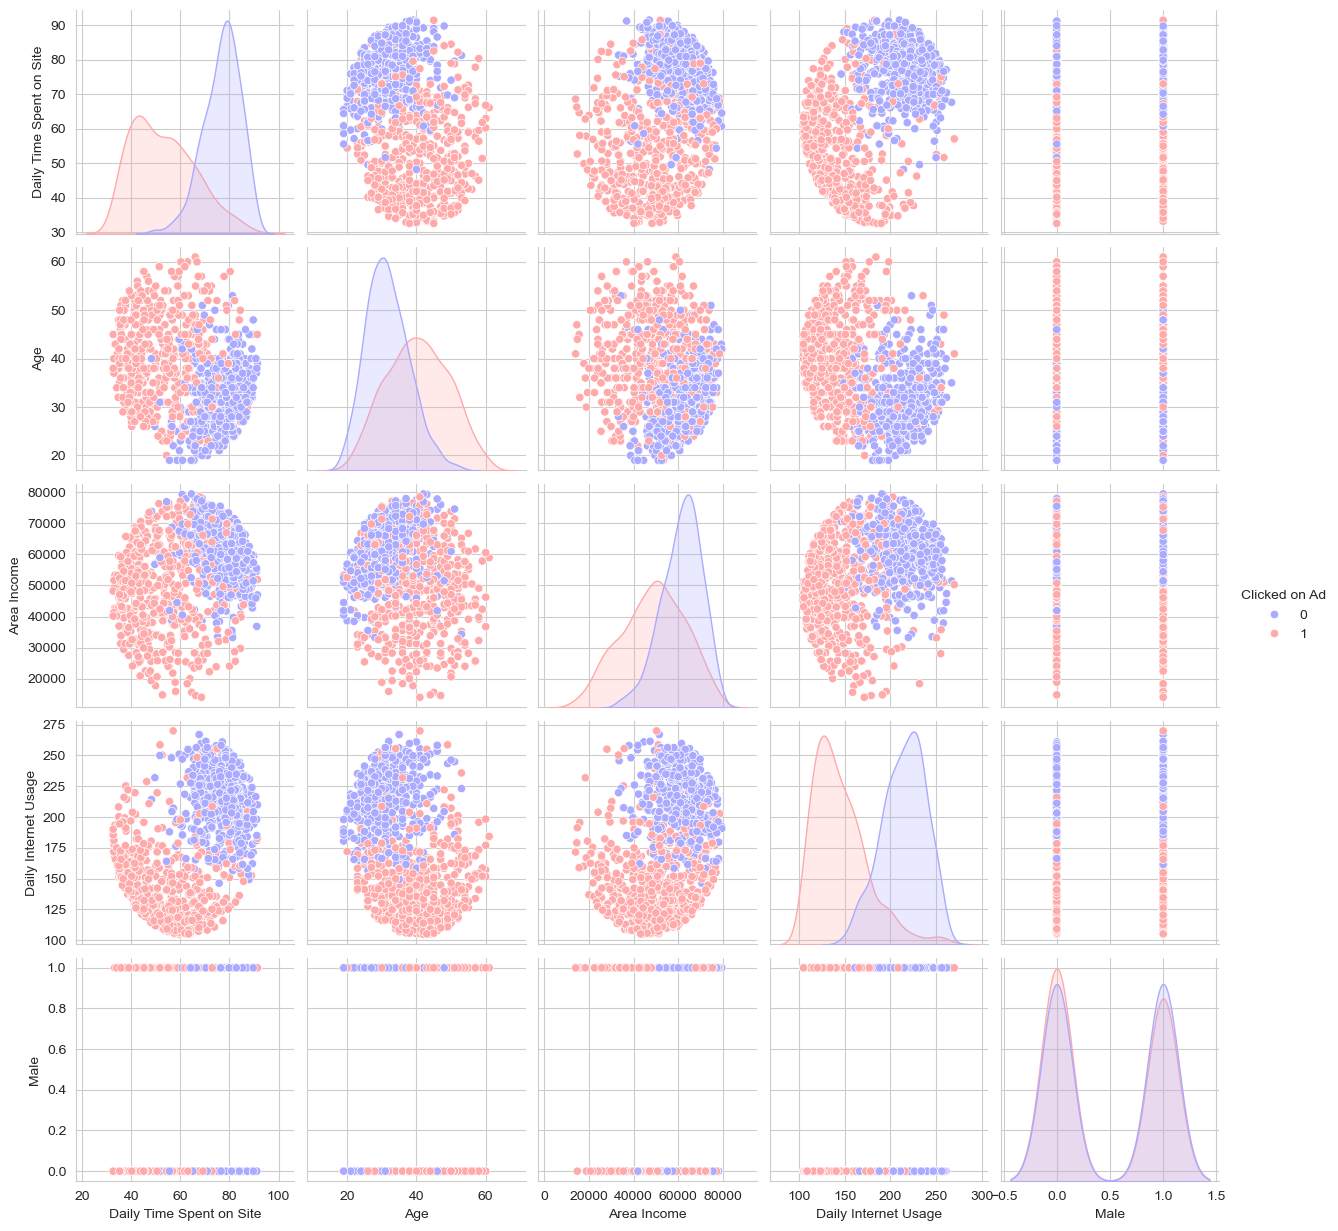

In [41]:
sns.pairplot(df,hue='Clicked on Ad',palette='bwr')

# Logistic Regression

Now it's time to do a train test split, and train our model!


**Split the data into training set and testing set**

In [43]:
from sklearn.model_selection import train_test_split

In [45]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

** Train and fit a logistic regression model on the training set.**

In [49]:
from sklearn.linear_model import LogisticRegression

In [51]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

## Predictions and Evaluations
** Now predict values for the testing data.**

In [53]:
predictions = logmodel.predict(X_test)

** Create a classification report for the model.**

In [65]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, confusion_matrix

In [57]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



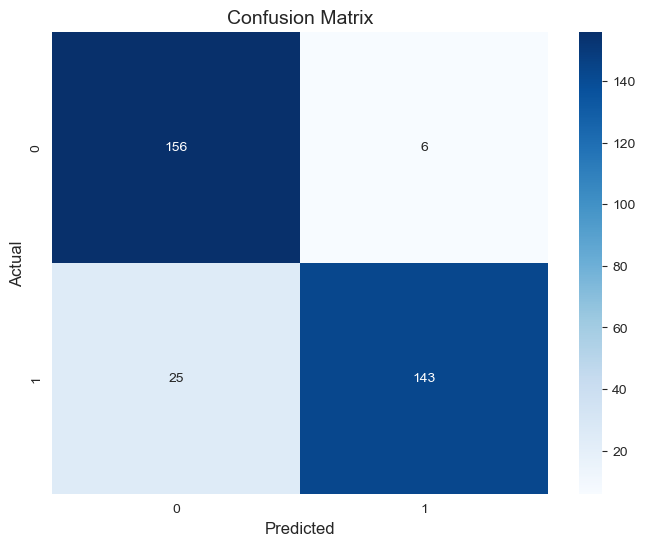

In [67]:
#Confusion Matrix
val_pred_binary = (predictions > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, val_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

## Great Job!